# Titanic survived Project

## Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


## Attribute Information

Passenger id- Unique Id of the passenger

Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Survived- Survived (0 = No; 1 = Yes)

Name- Name of the passenger

Sex- Sex of the passenger (Male, Female)

Age- Age of the passenger

Sibsp- Number of Siblings/Spouses Aboard

Parch- Number of Parents/Children Aboard

Ticket- Ticket Number

Fare- Passenger Fare (British pound)

Cabin- Cabin

Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')

## Dataset Summary

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.shape

(891, 12)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are three type of datatypes: int64,object,float64

## Comment

There are 891 rows and 12 columns in dataframe.

Numerical columns: 7 named as PassengerId, Survived, Pclass, Age, SibSp, Parch and Fare.
    
Categorical columns: 5 named as Name, Sex, Ticket, Cabin and Embarked.

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Comment

1. Survived is a binary signing where 1 represents survival and 0 represents non-survival.

2. Mean rate of survival is 0.383838 (which is approximately 38.38%), suggesting that less than half of the passengers survived.

3. Pclass represents the class of travel. The passengers are spread across three classes 1, 2 and 3.

4. Mean Pclass of 2.308642, implying that most passengers are in the second and third classes.

5. Age of the passengers has a mean of 29.699118 years.The youngest being 0.42 (42) years old and the oldest at 80 years.

6. The age data is incomplete because total entries are 891 an age have 714, so out of 714 entries are null values.

## Checking Null Values

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
missing_val = df.isnull().sum().sort_values(ascending = False)
percentage_missing_val =(missing_val/len(df))*100
print(pd.concat([missing_val, percentage_missing_val], axis =1, keys =['Missing Values', '% Missing data']))

             Missing Values  % Missing data
Cabin                   687       77.104377
Age                     177       19.865320
Embarked                  2        0.224467
PassengerId               0        0.000000
Survived                  0        0.000000
Pclass                    0        0.000000
Name                      0        0.000000
Sex                       0        0.000000
SibSp                     0        0.000000
Parch                     0        0.000000
Ticket                    0        0.000000
Fare                      0        0.000000


Entries: In the training dataset of 891 entries, several columns have missing values:

Age: 177 missing entries (19.87%).

Cabin: 687 missing entries (77.1%).

Embarked: 2 missing entries (0.22%).

## Missing Values in plot

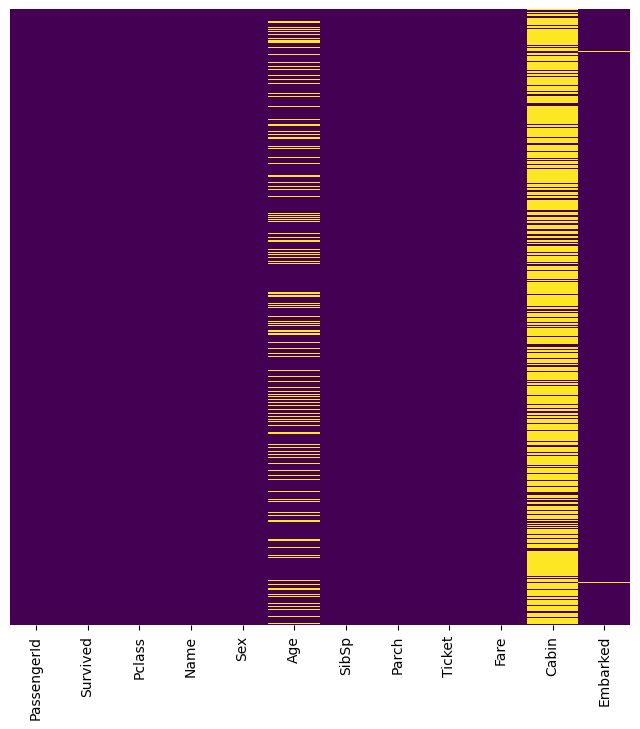

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

Dropping 'Cabin' since 77.10% of its values is missing and therefore it cannot contribute to building a good model for predicting the target variable values.

In [13]:
df.drop(columns=['Cabin'],inplace = True)

In [14]:
df['Embarked'].fillna('S',inplace=True)

In [15]:
fill_age=np.random.randint(df['Age'].mean()-df['Age'].std(),df['Age'].mean()+df['Age'].std(), size=177)

In [16]:
df['Age'][np.isnan(df['Age'])]=fill_age

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

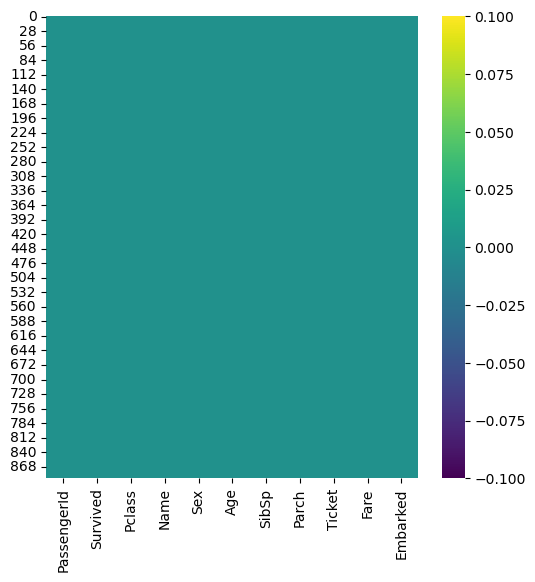

In [18]:
plt.figure(figsize = (6,6))
sns.heatmap(df.isnull(),cmap = 'viridis')
plt.show()

In [19]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

## Comment

'Survived' = Target/Label column has 2 categories/classes.

'sex' = Feature column has 2 categories/classes.

'Pclass' = Feature column has 2 categories/classes.

'Embarked' = Feature column has 3 categories/classes.

'SibSp' = Feature column has 7 discrete values.

'Parch' = Feature column has 7 discrete values.

In [20]:
print('\nSurvival Rate of Passenges')
print(df['Survived'].value_counts())


Survival Rate of Passenges
Survived
0    549
1    342
Name: count, dtype: int64


Out of 891 passengers, only 342 passengers survived

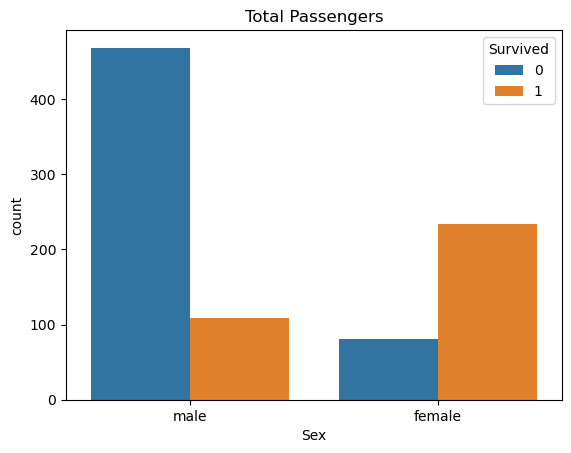

In [21]:
first_title = 'Total Passengers'
plt.title(first_title)
sns.countplot(x='Sex', data=df, hue="Survived")
plt.show()

In [22]:
print('\nGender-wise Survival Rate of Passengers')
df.groupby(['Sex','Survived'])['Survived'].count()


Gender-wise Survival Rate of Passengers


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

From the 342 survivals, 233 were female passengers and 109 were male passengers

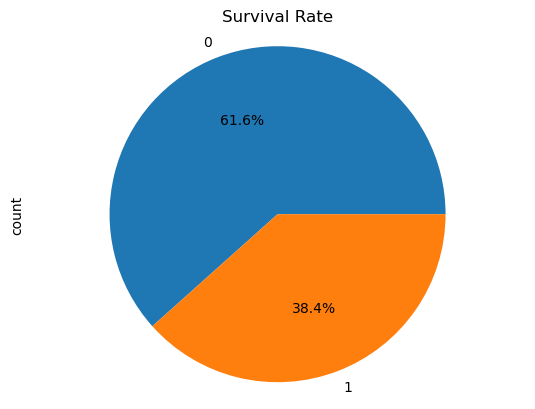

In [23]:
plt.title('Survival Rate')
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%',labels=df['Survived'].unique())
plt.axis('equal')
plt.show()

Only 38.4% passengers survived

## Passenger Class Vs Survivor

In [24]:
pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap='PuBu_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [25]:
pd.crosstab([df.Sex,df.Survived],df.Pclass, margins= True).style.background_gradient(cmap='RdBu_r')

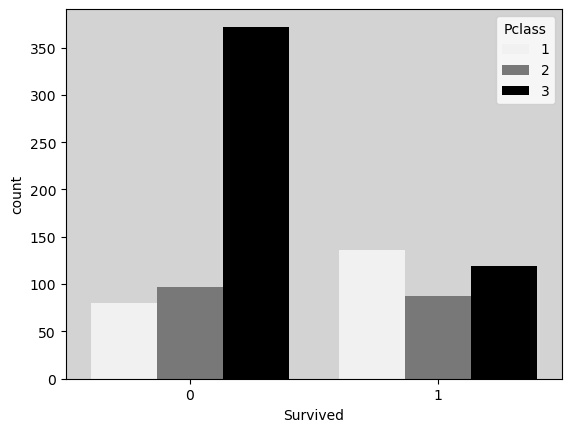

In [26]:
sns.countplot(x=df['Survived'],hue=df['Pclass'],color='k')
plt.gca().set_facecolor('lightgrey')
plt.show()

## Correlation

<function matplotlib.pyplot.show(close=None, block=None)>

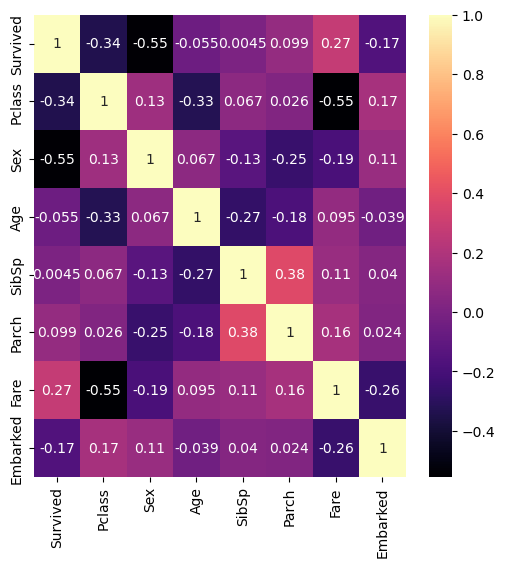

In [72]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,cmap='magma')
plt.show

## Outliers Detection

In [29]:
# Droping unnecessary column for further investigation
df.drop(["PassengerId", "Name" , "Ticket" ],axis=1,inplace=True)

In [30]:
# As we have lot of Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Sex', 'Embarked']}

In [31]:
Numerical_features= ['Survived', 'Pclass', 'SibSp', 'Parch','Age', 'Fare']
Categorical_features = ['Sex', 'Embarked']

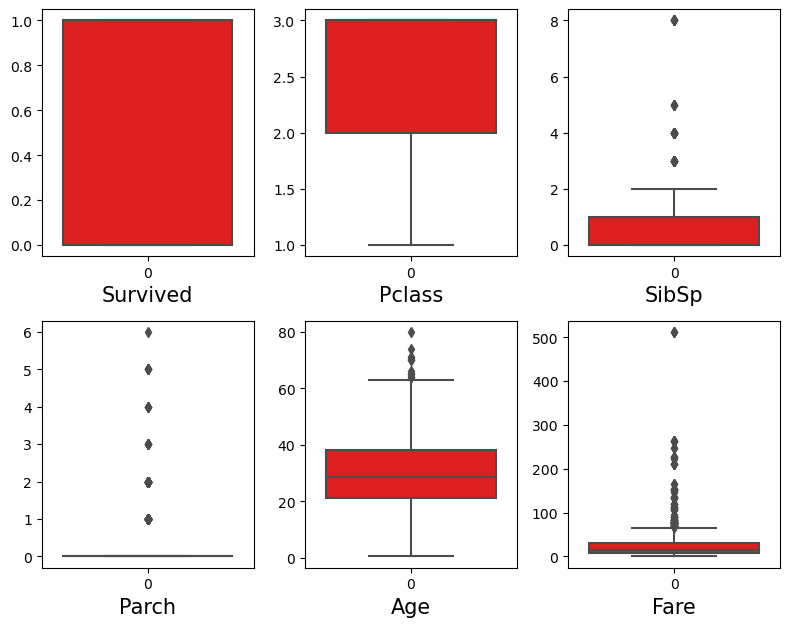

In [32]:
# Identifying the outliers using boxplot in train dataset
plt.figure(figsize=(8,9),facecolor='white')
plotnumber=1
for i in Numerical_features:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i],color='r')
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [34]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

In [35]:
# detect outliers from Age, SibSp , Parch and Fare
from collections import Counter
Outliers_to_drop = detect_outliers(df,2,["Age","SibSp","Parch","Fare"])

In [36]:
# Drop outliers
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [37]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

## Encoding Categorical Feature

In [38]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
for i in Categorical_features:
    df[i] = LE.fit_transform(df[i])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Train test split

First We Split Data into X and y.

Secondly We Split Data into Train and Test.

Train Data is Used to Train Model and Testing Data is Used to Evaluate Model Performence.

In [39]:
# Splitting data in target and dependent feature
X = df.drop(['Survived'], axis =1)
Y = df['Survived']

In [40]:
X.shape

(879, 7)

## Machine Learning Model Building

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)

In [42]:
clf=DecisionTreeClassifier()

In [43]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [44]:
Y_pred=clf.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.7954545454545454

## Finding Best Random State

In [46]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [47]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## LogisticRegression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,300):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.2, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.9034090909090909 on Random_state 275


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=67, test_size=.25)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (659, 7)
Training target vector size: (659,)
Test feature matrix size: (220, 7)
Test target vector size: (220,)


In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=69, test_size=.2)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8465909090909091


Confusion matrix of Logistics Regression : 
 [[103   8]
 [ 19  46]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       111
           1       0.85      0.71      0.77        65

    accuracy                           0.85       176
   macro avg       0.85      0.82      0.83       176
weighted avg       0.85      0.85      0.84       176



## Finding Optimal value of N_neighbors for KNN

In [53]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k =', K , 'is:', error)

RMSE value for k = 1 is: 0.41968602983225883
RMSE value for k = 2 is: 0.37688918072220456
RMSE value for k = 3 is: 0.39167472590032015
RMSE value for k = 4 is: 0.37688918072220456
RMSE value for k = 5 is: 0.3692744729379982
RMSE value for k = 6 is: 0.3535533905932738
RMSE value for k = 7 is: 0.3614994027406106
RMSE value for k = 8 is: 0.3614994027406106
RMSE value for k = 9 is: 0.3692744729379982
RMSE value for k = 10 is: 0.3692744729379982
RMSE value for k = 11 is: 0.3692744729379982
RMSE value for k = 12 is: 0.3454246398538787
RMSE value for k = 13 is: 0.37688918072220456
RMSE value for k = 14 is: 0.37688918072220456
RMSE value for k = 15 is: 0.39167472590032015
RMSE value for k = 16 is: 0.3692744729379982
RMSE value for k = 17 is: 0.37688918072220456
RMSE value for k = 18 is: 0.37688918072220456
RMSE value for k = 19 is: 0.3692744729379982
RMSE value for k = 20 is: 0.3692744729379982


<Axes: >

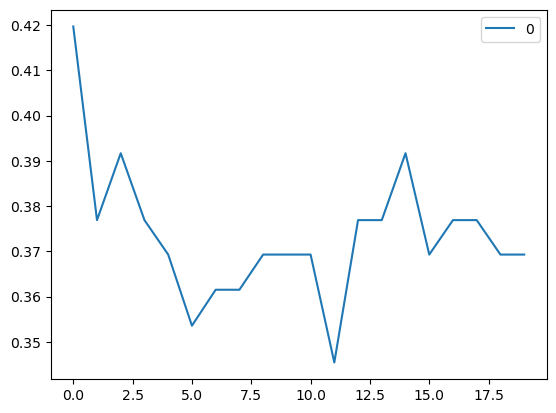

In [54]:
# plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

At k = 12, the RMSE is approximately 0.34542, and shoots up on further increasing the k value. We can safely say that k=12 will give us the best result in this case

In [52]:
model=[
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for i in model:
    i.fit(X_train,Y_train)
    y_pred=i.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',i,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('-'*65)

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8636363636363636


Confusion matrix : 
 [[104   7]
 [ 17  48]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       111
           1       0.87      0.74      0.80        65

    accuracy                           0.86       176
   macro avg       0.87      0.84      0.85       176
weighted avg       0.86      0.86      0.86       176



-----------------------------------------------------------------
Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.8636363636363636


Confusion matrix : 
 [[106   5]
 [ 19  46]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       111
           1       0.90      0.71      0.79        65

    accuracy                           0.86       176
   macro avg       0.87      0.83      0.85 

 we will continue further investigation with crossvalidation of above model with RandomForestClassifier()

In [55]:
from sklearn.model_selection import cross_val_score
model=[
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('-'*65)



Cross Validation Score SVC() :

Score : [0.57386364 0.72727273 0.68181818 0.71590909 0.70857143]
Mean Score : 0.681487012987013
Std deviation : 0.055852802109272744


-----------------------------------------------------------------


Cross Validation Score GaussianNB() :

Score : [0.75568182 0.77840909 0.79545455 0.77840909 0.8       ]
Mean Score : 0.7815909090909091
Std deviation : 0.01563728855615414


-----------------------------------------------------------------


Cross Validation Score DecisionTreeClassifier() :

Score : [0.70454545 0.76704545 0.78409091 0.72727273 0.78285714]
Mean Score : 0.7531623376623378
Std deviation : 0.03182757348805104


-----------------------------------------------------------------


Cross Validation Score KNeighborsClassifier(n_neighbors=12) :

Score : [0.60227273 0.68181818 0.67613636 0.71022727 0.74285714]
Mean Score : 0.6826623376623377
Std deviation : 0.046666970358584234


-----------------------------------------------------------------




In [64]:
from sklearn.model_selection import GridSearchCV
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],
             'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [30, 50, 60]})

In [65]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 60}

## Final Prediction

In [70]:
prediction = GCV.predict(X_test)
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.tail(5)

,Predicted Values,Actual Values
171,0,0
172,0,0
173,1,1
174,1,1
175,1,1


## Saving Model

In [71]:
import joblib
joblib.dump(GCV,'Titanic_Survival_Project.pkl')

['Titanic_Survival_Project.pkl']